In [8]:
import pandas as pd
import matplotlib.pyplot as plt

#Loading the Data
df = pd.read_csv('/merged_ratings.csv')
print(df[['title' ,'type']].head()) #Showing the Title and Type of First 5 movies

                   title     type
0   Dick Johnson Is Dead    Movie
1              Ganglands  TV Show
2  Jailbirds New Orleans  TV Show
3           Kota Factory  TV Show
4          Midnight Mass  TV Show


In [13]:
print(df.columns) #Showing the column titles

Index(['imdb_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'listed_in', 'description', 'age_certification', 'runtime',
       'imdb_score', 'imdb_votes'],
      dtype='object')


In [16]:
#Loading DataFrames for Movies and TV Shows
movies_df = df[df['type'] == 'Movie']
tv_shows_df = df[df['type'] == 'TV Show']
print(movies_df[['title', 'type', 'imdb_score']].head()) # Display the first 50 rows of the movies DataFrame
print(tv_shows_df[['title', 'type', 'imdb_score']].head()) # Display the first 50 rows of the TV shows DataFrame

                               title   type  imdb_score
0               Dick Johnson Is Dead  Movie         7.4
5   My Little Pony: A New Generation  Movie         6.8
6                            Sankofa  Movie         7.0
8                       The Starling  Movie         6.3
11  Confessions of an Invisible Girl  Movie         5.2
                           title     type  imdb_score
1                      Ganglands  TV Show         7.0
2          Jailbirds New Orleans  TV Show         6.6
3                   Kota Factory  TV Show         9.3
4                  Midnight Mass  TV Show         7.7
7  The Great British Baking Show  TV Show         8.6


In [30]:
import numpy as np
#Function to calculate the average of imdb scores
def imdb_score_distribution(shows_df):
  imdb_scores = shows_df['imdb_score'].head(100).values  # Convert the 'imdb_score' column to a NumPy array first 100 values
  imdb_scores_sum = np.sum(imdb_scores)  # Calculate the sum of IMDb scores
  imdb_scores_avg = np.mean(imdb_scores)  # Calculate the average of IMDb scores

  print("Average of IMDb scores:", round(imdb_scores_avg, 2))

imdb_score_distribution(movies_df) # To find average of imdb scores of Movies
imdb_score_distribution(tv_shows_df) # To find average of imdb scores of TV Shows

Average of IMDb scores: 6.04
Average of IMDb scores: 7.03


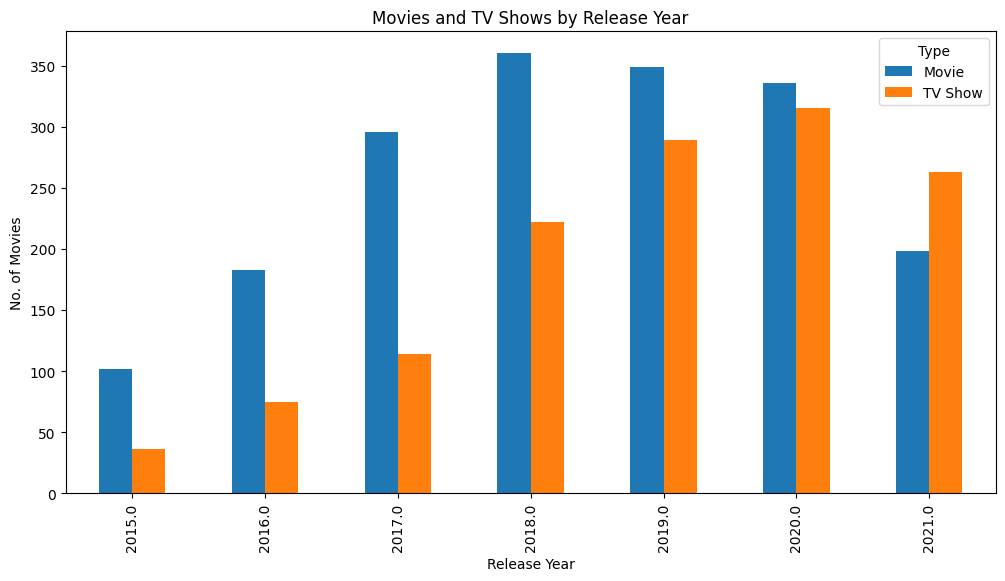

In [52]:
import matplotlib.pyplot as plt
import numpy as np

after_2015 = df[df['release_year'] >= 2015] #DataFrame to show releases after 2015

# Group the data by 'release_year' and 'type' and count the occurrences
grouped_data = after_2015.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Plot the clustered column chart
grouped_data.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Release Year')
plt.ylabel('No. of Movies')
plt.title('Movies and TV Shows by Release Year')
plt.legend(title='Type')
plt.show()